In [1]:
%matplotlib inline

# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read csv into DF
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
# Identify incomplete rows
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [5]:
# Drop all rows with missing information
df = df.dropna(how='any')
df.count()

id                                38821
name                              38821
host_id                           38821
host_name                         38821
neighbourhood_group               38821
neighbourhood                     38821
latitude                          38821
longitude                         38821
room_type                         38821
price                             38821
minimum_nights                    38821
number_of_reviews                 38821
last_review                       38821
reviews_per_month                 38821
calculated_host_listings_count    38821
availability_365                  38821
dtype: int64

In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
#count outliers
df.loc[df["price"] >= 1000].count()

id                                137
name                              137
host_id                           137
host_name                         137
neighbourhood_group               137
neighbourhood                     137
latitude                          137
longitude                         137
room_type                         137
price                             137
minimum_nights                    137
number_of_reviews                 137
last_review                       137
reviews_per_month                 137
calculated_host_listings_count    137
availability_365                  137
dtype: int64

In [8]:
# Remove unrealistic rental price values
df = df.loc[(df["price"] >= 35) & (df["price"] <= 1000) & (df["availability_365"] >= 1)]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [9]:
### create a special stats df

stats_df = df
del stats_df['id']
del stats_df['host_id']
del stats_df['latitude']
del stats_df['longitude']
stats_df.describe()

###

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,25579.000000,25579.000000,25579.000000,25579.000000,25579.000000,25579.000000
mean,144.903163,6.545565,38.427030,1.814158,7.021502,170.073654
std,118.727803,19.595165,54.558559,1.805784,32.108035,123.965632
min,35.000000,1.000000,1.000000,0.010000,1.000000,1.000000
25%,70.000000,1.000000,5.000000,0.450000,1.000000,52.000000
50%,110.000000,2.000000,16.000000,1.240000,1.000000,159.000000
75%,178.000000,4.000000,50.000000,2.690000,3.000000,291.000000
max,1000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
## Boxplot shows a good amount of outliers greater than 350.
boxplot_df = df.loc[df["price"] <= 400]

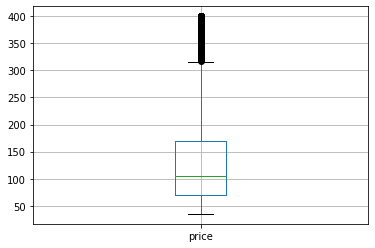

In [11]:
boxplot = boxplot_df.boxplot(column = ['price'])

In [12]:
# Check values in 'room_type' column
room_type_list = df['room_type'].value_counts()
room_type_list

Entire home/apt    13611
Private room       11500
Shared room          468
Name: room_type, dtype: int64

In [13]:
room_type_list.index.tolist()

['Entire home/apt', 'Private room', 'Shared room']

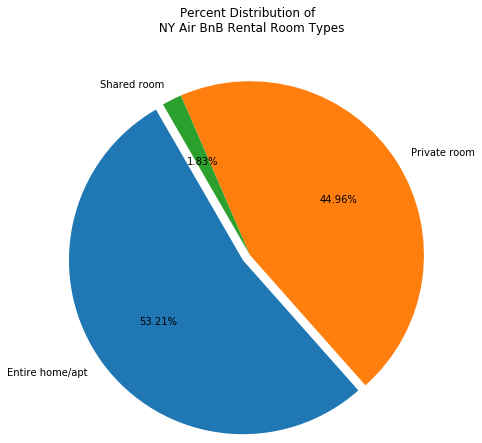

In [14]:
# Create a pie chart depicting the percent distribution of room types in the NY area
p_label = room_type_list.index.tolist()
explode_list = [0.1, 0, 0]

plt.pie(room_type_list, 
            radius = 2, 
            labels = p_label,
            explode = explode_list,
            autopct = '%.2f%%',
            startangle = 120)

plt.title("Percent Distribution of \n NY Air BnB Rental Room Types", y=1.5)

plt.show()

In [15]:
neighbourhood_list = df['neighbourhood'].value_counts()
neighbourhood_list

Bedford-Stuyvesant           2154
Williamsburg                 1779
Harlem                       1495
Hell's Kitchen               1189
Bushwick                     1179
Upper East Side               889
Upper West Side               848
East Village                  810
Crown Heights                 776
Midtown                       687
East Harlem                   648
Chelsea                       529
Greenpoint                    489
Astoria                       463
Washington Heights            456
Lower East Side               446
Financial District            397
East Flatbush                 350
West Village                  347
Flushing                      316
Flatbush                      300
Clinton Hill                  289
Long Island City              287
Prospect-Lefferts Gardens     282
Park Slope                    255
Fort Greene                   241
Murray Hill                   237
Chinatown                     207
Sunset Park                   205
Ridgewood     

In [16]:
# Down Size to top 10
top10_neighbourhood_list = neighbourhood_list[0:10]

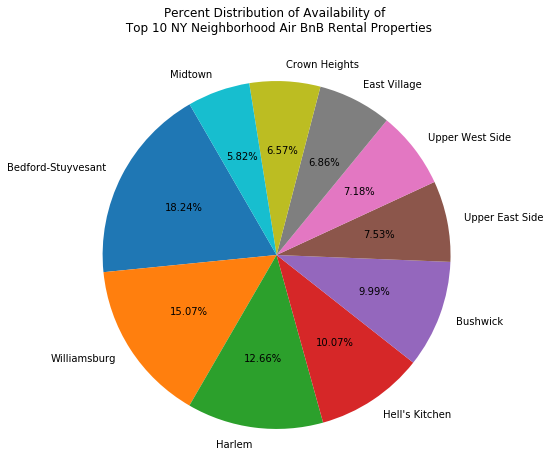

In [17]:
# Create a pie chart depicting the percent distribution of room types in the NY area
pi_label = top10_neighbourhood_list.index.tolist()

plt.pie(top10_neighbourhood_list, 
            radius = 2, 
            labels = pi_label,
            autopct = '%.2f%%',
            startangle = 120)

plt.title("Percent Distribution of Availability of \n Top 10 NY Neighborhood Air BnB Rental Properties", y=1.5)

plt.show()

In [18]:
#Create dataframe with the number of rental properties in each neighbourhood group
df_groupby_neighborhood = df.groupby(["neighbourhood_group"]).count()

df_groupby_neighborhood

,name,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,
Bronx,702,702,702,702,702,702,702,702,702,702,702
Brooklyn,10420,10420,10420,10420,10420,10420,10420,10420,10420,10420,10420
Manhattan,10705,10705,10705,10705,10705,10705,10705,10705,10705,10705,10705
Queens,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493
Staten Island,259,259,259,259,259,259,259,259,259,259,259


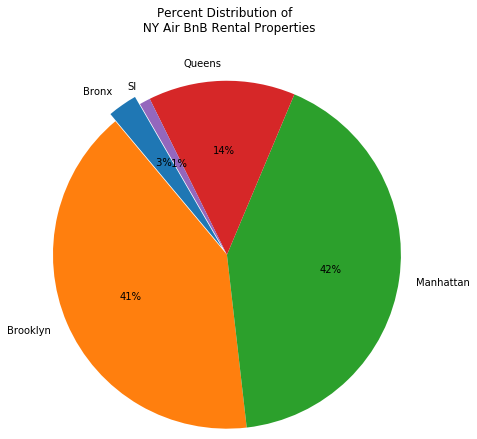

In [19]:
# Create a pie chart depicting the number of rental properties in each neighbourhood group
pie_label = df_groupby_neighborhood.index.tolist()
pie_label[4] = "SI"
explode_list = [0.1, 0,
                0, 0, 0]

plt.pie(df_groupby_neighborhood["name"], 
            radius = 2, 
            labels = pie_label,
            explode = explode_list,
            autopct = '%2.f%%',
            startangle = 120)

plt.title("Percent Distribution of \n NY Air BnB Rental Properties", y=1.5)

plt.show()

In [36]:
dfgroupby_stats = df.groupby(["neighbourhood_group","room_type"]).describe()
dfgroupby_stats.head()

dfgroupby_stats.to_csv("stats.csv")
dfgroupby_stats.head()

price                                \
                                      count        mean         std   min   
neighbourhood_group room_type                                               
Bronx               Entire home/apt   272.0  122.014706   78.331728  35.0   
                    Private room      416.0   59.336538   24.920640  35.0   
                    Shared room        14.0  111.571429  200.595542  40.0   
Brooklyn            Entire home/apt  5404.0  174.608623  109.564206  40.0   
                    Private room     4891.0   75.689225   49.168085  35.0   

                                                                   \
                                       25%    50%     75%     max   
neighbourhood_group room_type                                       
Bronx               Entire home/apt   80.0  100.0  132.75   670.0   
                    Private room      43.0   53.0   69.25   300.0   
                    Shared room       46.0   50.5   56.50   800.0   
Brooklyn            Entire home/apt  110.0  150.0  199.00  1000.0   
                    Private room      50.0   65.0   85.00  1000.0   

                                    minimum_nights            ...  \
                                             count      mean  ...   
neighbourhood_group room_type                                 ...   
Bronx               Entire home/apt          272.0  5.963235  ...   
                    Private room             416.0  3.197115  ...   
                    Shared room               14.0  1.785714  ...   
Brooklyn            Entire home/apt         5404.0  6.455588  ...   
                    Private room            4891.0  5.083623  ...   

                                    calculated_host_listings_count         \
                                                               75%    max   
neighbourhood_group room_type                                               
Bronx               Entire home/apt                           2.00   13.0   
                    Private room                              3.00   13.0   
                    Shared room                               2.75   13.0   
Brooklyn            Entire home/apt                           2.00   87.0   
                    Private room                              3.00  103.0   

                                    availability_365                          \
                                               count        mean         std   
neighbourhood_group room_type                                                  
Bronx               Entire home/apt            272.0  191.202206  124.354865   
                    Private room               416.0  206.850962  124.645220   
                    Shared room                 14.0  228.214286  128.147858   
Brooklyn            Entire home/apt           5404.0  153.699112  119.417600   
                    Private room              4891.0  171.496422  126.520893   

                                                                        
                                      min     25%    50%    75%    max  
neighbourhood_group room_type                                           
Bronx               Entire home/apt   1.0   74.75  178.5  319.5  365.0  
                    Private room      1.0   81.00  191.0  333.0  365.0  
                    Shared room      15.0  102.00  255.0  353.5  365.0  
Brooklyn            Entire home/apt   1.0   37.00  137.0  264.0  365.0  
                    Private room      1.0   55.00  155.0  306.0  365.0  

[5 rows x 48 columns]

In [21]:
# group dataframe by neighbourhood group and by room type, and then calculate the mean on all numerical columns
dfgroupby = df.groupby(["neighbourhood_group","room_type"]).mean()
#dfgroupby_roomtype = df.groupby['room_type']
#dfgroupby_roomtype = da

In [22]:
dfgroupby = dfgroupby.reset_index()
dfgroupby

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Bronx,Entire home/apt,122.014706,5.963235,41.073529,2.446213,1.926471,191.202206
1,Bronx,Private room,59.336538,3.197115,33.115385,1.790096,2.439904,206.850962
2,Bronx,Shared room,111.571429,1.785714,7.928571,0.888571,2.857143,228.214286
3,Brooklyn,Entire home/apt,174.608623,6.455588,43.977979,1.773203,2.149704,153.699112
4,Brooklyn,Private room,75.689225,5.083623,36.307708,1.716213,3.147823,171.496422
5,Brooklyn,Shared room,58.728000,4.608000,20.696000,1.025040,8.680000,240.936000
6,Manhattan,Entire home/apt,231.994894,10.459694,30.891691,1.539432,18.490020,168.440662
7,Manhattan,Private room,111.615848,5.206620,45.623119,1.980554,4.149699,164.344534
8,Manhattan,Shared room,77.696850,2.590551,32.625984,2.201811,4.232283,196.972441
9,Queens,Entire home/apt,143.905759,4.611070,42.120419,2.386717,1.854151,180.239342


In [23]:
#create seperate data frames by sorting on each seperate neighbourhood group
bronx = dfgroupby[dfgroupby["neighbourhood_group"]=="Bronx"]
Brooklyn = dfgroupby[dfgroupby["neighbourhood_group"]=="Brooklyn"]
Manhattan = dfgroupby[dfgroupby["neighbourhood_group"]=="Manhattan"]
Queens = dfgroupby[dfgroupby["neighbourhood_group"]=="Queens"]
Staten_Island = dfgroupby[dfgroupby["neighbourhood_group"]=="Staten Island"]

In [24]:
Manhattan

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
6,Manhattan,Entire home/apt,231.994894,10.459694,30.891691,1.539432,18.490020,168.440662
7,Manhattan,Private room,111.615848,5.206620,45.623119,1.980554,4.149699,164.344534
8,Manhattan,Shared room,77.696850,2.590551,32.625984,2.201811,4.232283,196.972441


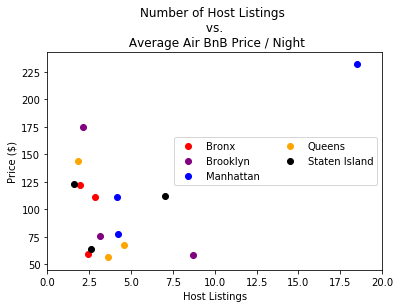

In [25]:
bronx_map = plt.scatter(bronx["calculated_host_listings_count"],bronx["price"], color = "red")
brooklyn_map = plt.scatter(Brooklyn["calculated_host_listings_count"],Brooklyn["price"], color = "purple")
Manhattan_map = plt.scatter(Manhattan["calculated_host_listings_count"],Manhattan["price"], color = "blue")
Queens_map = plt.scatter(Queens["calculated_host_listings_count"],Queens["price"], color = "orange")
Staten_Island_map = plt.scatter(Staten_Island["calculated_host_listings_count"],Staten_Island["price"], color = "black")

plt.xlim(0,20)
plt.xlabel("Host Listings")
plt.ylabel("Price ($)")
plt.title("Number of Host Listings \n vs. \n Average Air BnB Price / Night")

plt.legend((bronx_map, brooklyn_map, Manhattan_map,Queens_map,Staten_Island_map),
            ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"),
           scatterpoints = 1,
           loc="center right",
           ncol=2,
           fontsize =10)

plt.show()

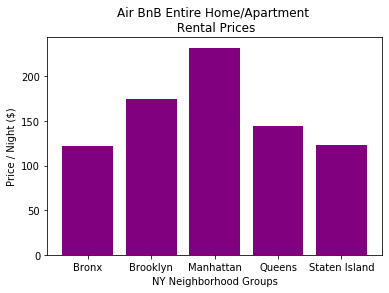

In [26]:
## 10-7-19
### This bar graph shows the average Air BnB price / night for renting an entire home/aprtment in the NY area

plt.bar("Bronx" , bronx.loc[bronx["room_type"] == "Entire home/apt", "price"], color = "purple")  # value of 127.506596
plt.bar("Brooklyn", Brooklyn.loc[Brooklyn["room_type"] == "Entire home/apt", "price"], color = "purple")
plt.bar("Manhattan", Manhattan.loc[Manhattan["room_type"] == "Entire home/apt", "price"], color = "purple")
plt.bar("Queens", Queens.loc[Queens["room_type"] == "Entire home/apt", "price"], color = "purple")
plt.bar("Staten Island", Staten_Island.loc[Staten_Island["room_type"] == "Entire home/apt", "price"], color = "purple")

plt.xlabel("NY Neighborhood Groups")
plt.ylabel("Price / Night ($)")

plt.title("Air BnB Entire Home/Apartment \n Rental Prices")

plt.show()

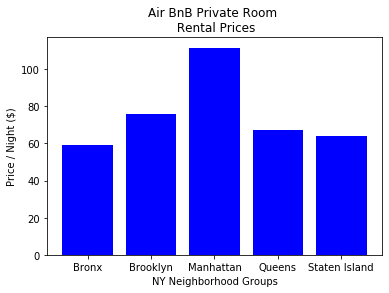

In [27]:
## 10-7-19
### This bar graph shows the average Air BnB price / night for renting a Private room in the NY area

plt.bar("Bronx" , bronx.loc[bronx["room_type"] == "Private room", "price"], color = "blue")
plt.bar("Brooklyn", Brooklyn.loc[Brooklyn["room_type"] == "Private room", "price"], color = "blue")
plt.bar("Manhattan", Manhattan.loc[Manhattan["room_type"] == "Private room", "price"], color = "blue")
plt.bar("Queens", Queens.loc[Queens["room_type"] == "Private room", "price"], color = "blue")
plt.bar("Staten Island", Staten_Island.loc[Staten_Island["room_type"] == "Private room", "price"], color = "blue")

plt.xlabel("NY Neighborhood Groups")
plt.ylabel("Price / Night ($)")

plt.title("Air BnB Private Room \n Rental Prices")

plt.show()

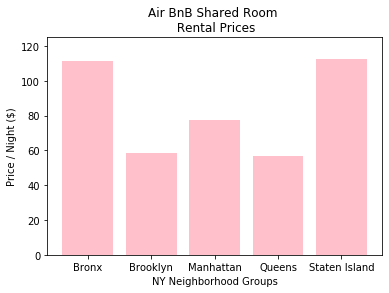

In [28]:
## 10-7-19
### This bar graph shows the average Air BnB price / night for renting a Shared room in the NY area

plt.bar("Bronx" , bronx.loc[bronx["room_type"] == "Shared room", "price"], color = "pink")  # value of 127.506596
plt.bar("Brooklyn", Brooklyn.loc[Brooklyn["room_type"] == "Shared room", "price"], color = "pink")
plt.bar("Manhattan", Manhattan.loc[Manhattan["room_type"] == "Shared room", "price"], color = "pink")
plt.bar("Queens", Queens.loc[Queens["room_type"] == "Shared room", "price"], color = "pink")
plt.bar("Staten Island", Staten_Island.loc[Staten_Island["room_type"] == "Shared room", "price"], color = "pink")

plt.xlabel("NY Neighborhood Groups")
plt.ylabel("Price / Night ($)")
plt.ylim(0,125)

plt.title("Air BnB Shared Room \n Rental Prices")

plt.show()

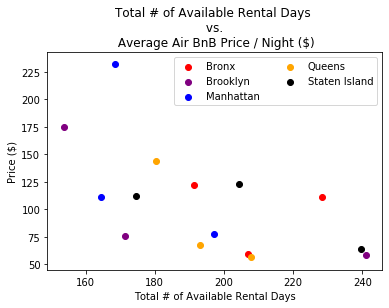

In [29]:
bronx_map = plt.scatter(bronx["availability_365"],bronx["price"], color = "red")
brooklyn_map = plt.scatter(Brooklyn["availability_365"],Brooklyn["price"], color = "purple")
Manhattan_map = plt.scatter(Manhattan["availability_365"],Manhattan["price"], color = "blue")
Queens_map = plt.scatter(Queens["availability_365"],Queens["price"], color = "orange")
Staten_Island_map = plt.scatter(Staten_Island["availability_365"],Staten_Island["price"], color = "black")
plt.xlabel("Total # of Available Rental Days")
plt.ylabel("Price ($)")


plt.title("Total # of Available Rental Days \n vs. \n Average Air BnB Price / Night ($)")

plt.legend((bronx_map, brooklyn_map, Manhattan_map,Queens_map,Staten_Island_map),
            ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"),
           scatterpoints = 1,
           loc="upper right",
           ncol=2,
           fontsize =10)

plt.show()
#z = np.polyfit(bronx["availability_365"], bronx["price"], 1)
#p = np.poly1d(z)
#plt.plot(bronx["availability_365"],p(bronx["availability_365"]),"r--")

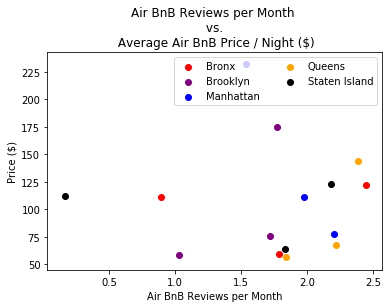

In [30]:
bronx_map = plt.scatter(bronx["reviews_per_month"],bronx["price"], color = "red")
brooklyn_map = plt.scatter(Brooklyn["reviews_per_month"],Brooklyn["price"], color = "purple")
Manhattan_map = plt.scatter(Manhattan["reviews_per_month"],Manhattan["price"], color = "blue")
Queens_map = plt.scatter(Queens["reviews_per_month"],Queens["price"], color = "orange")
Staten_Island_map = plt.scatter(Staten_Island["reviews_per_month"], Staten_Island["price"], color = "black")
plt.legend((bronx_map, brooklyn_map, Manhattan_map,Queens_map,Staten_Island_map),
            ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"),
           scatterpoints = 1,
           loc="upper right",
           ncol=2,
           fontsize =10)
plt.xlabel("Air BnB Reviews per Month")
plt.ylabel("Price ($)")

plt.title("Air BnB Reviews per Month \n vs. \n Average Air BnB Price / Night ($)")

plt.show()

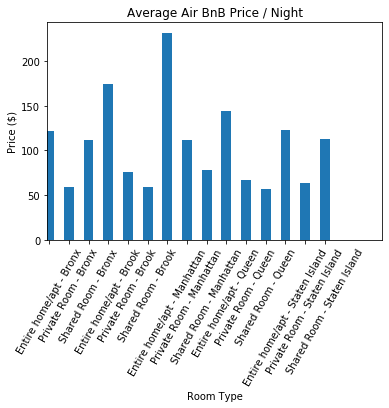

In [31]:
# Make fake dataset
height = [bronx["price"][0], bronx["price"][1], bronx["price"][2],
          Brooklyn["price"][3], Brooklyn["price"][4], Brooklyn["price"][5],
          Manhattan["price"][6], Manhattan["price"][7], Manhattan["price"][8],
          Queens["price"][9], Queens["price"][10], Queens["price"][11],
          Staten_Island["price"][12], Staten_Island["price"][13], Staten_Island["price"][14]]
bars = ('Entire home/apt - Bronx', 'Private Room - Bronx', 'Shared Room - Bronx', 
        'Entire home/apt - Brook', 'Private Room - Brook', 'Shared Room - Brook',
        'Entire home/apt - Manhattan', 'Private Room - Manhattan', 'Shared Room - Manhattan',
        'Entire home/apt - Queen', 'Private Room - Queen', 'Shared Room - Queen',
        'Entire home/apt - Staten Island', 'Private Room - Staten Island', 'Shared Room - Staten Island')
#room types

# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos = np.arange(1, 150, 10)
 
# Create bars
plt.bar(y_pos, height, width = 5)

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 60)

plt.xlim(0, 170)

#xticks = ["Private room",]
#plt.bar("home-Bronx", bronx["price"][0],color = "red", width = 1.5)
#plt.bar("Private-Bronx", bronx["price"][1],color = "red", width = 1.5)
#plt.bar("Shared-Bronx", bronx["price"][2],color = "red", width = 1.5)
#plt.bar("home-Brook", Brooklyn["price"][3],color = "purple", width = 1.5)
#plt.bar("Private-Brook", Brooklyn["price"][4],color = "purple", width = 1.5)
#plt.bar("Shared-Brook", Brooklyn["price"][5],color = "purple", width = 1.5)
#plt.bar("Private-home/apt-Man" , Manhattan["price"][6],color = "blue", width = 1.5)
#plt.bar("Private-Man" , Manhattan["price"][7],color = "blue", width = 1.5)
#plt.bar("Shared-Man" , Manhattan["price"][8],color = "blue", width = 1.5)
#plt.bar("Private-home/apt-Que" , Queens["price"][9],color = "orange", width = 1.5)
#plt.bar("Private-Que" , Queens["price"][10],color = "orange", width = 1.5)
#plt.bar("Shared-Que" , Queens["price"][11],color = "orange", width = 1.5)
#plt.bar("Private-home/apt-Sta" , Staten_Island["price"][12],color = "black", width = 1.5)
#plt.bar("Private-Sta" , Staten_Island["price"][13],color = "black", width = 1.5)
#plt.bar("Shared-Sta" , Staten_Island["price"][14],color = "black", width = 1.5)
#plt.figure(figsize=(30,30))
#plt.xticks(rotation=60)
#plt.tight_layout()

#plt.xlabel("Room Type")
#plt.ylabel("Price ($)")

#plt.title("Average Air BnB Price / Night")

#plt.show()

In [32]:
Brooklyn["price"]

3    174.608623
4     75.689225
5     58.728000
Name: price, dtype: float64

In [33]:
Manhattan["price"]

6    231.994894
7    111.615848
8     77.696850
Name: price, dtype: float64